<a href="https://colab.research.google.com/github/somnathsingh31/Projects/blob/Temperory/Decision_Tree_And_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
loans = pd.read_csv('loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


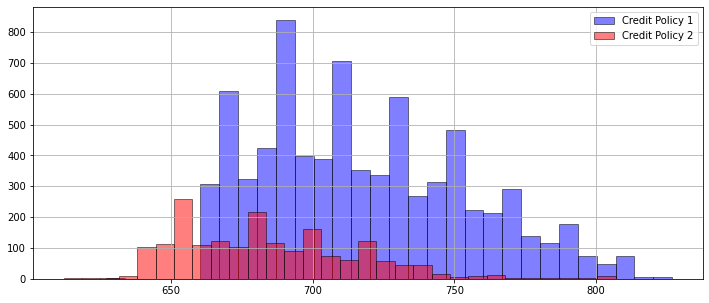

In [25]:
plt.figure(figsize=(12,5))
loans[loans['credit.policy'] == 1]['fico'].hist(alpha = 0.5, color = 'blue', bins = 30, label = 'Credit Policy 1',edgecolor='black')
loans[loans['credit.policy'] == 0]['fico'].hist(alpha = 0.5, color = 'red', bins = 30, label = 'Credit Policy 2',edgecolor='black')
plt.legend()
#Note: label will appear in plot only after mentioning plt.legend()

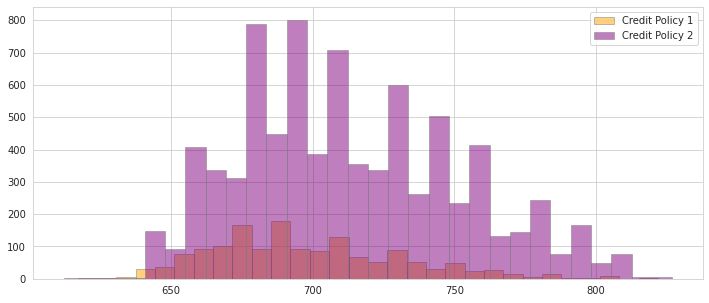

In [35]:
plt.figure(figsize=(12,5))
loans[loans['not.fully.paid'] == 1]['fico'].hist(alpha = 0.5, color = 'orange', bins = 30, label = 'Credit Policy 1',edgecolor='gray')
loans[loans['not.fully.paid'] == 0]['fico'].hist(alpha = 0.5, color = 'purple', bins = 30, label = 'Credit Policy 2', edgecolor='gray')
plt.legend()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='purpose', ylabel='count'>

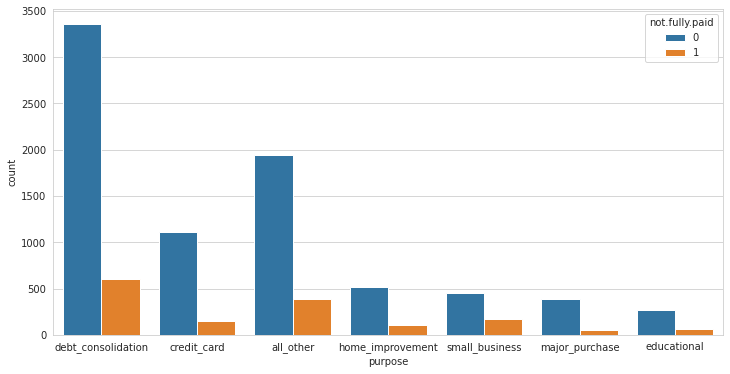

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot('purpose', data = loans, hue = 'not.fully.paid')

<Figure size 864x432 with 0 Axes>

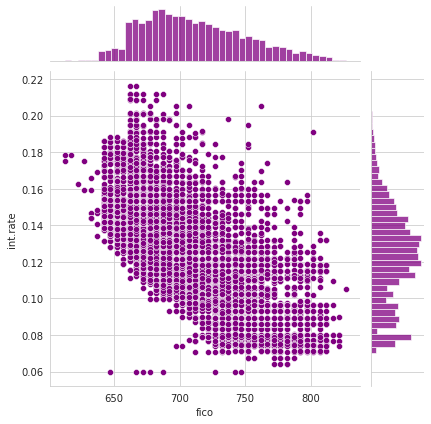

In [36]:
plt.figure(figsize=(12,6))
sns.jointplot(x='fico', y ='int.rate', data = loans, color = 'purple')

<Figure size 432x288 with 0 Axes>

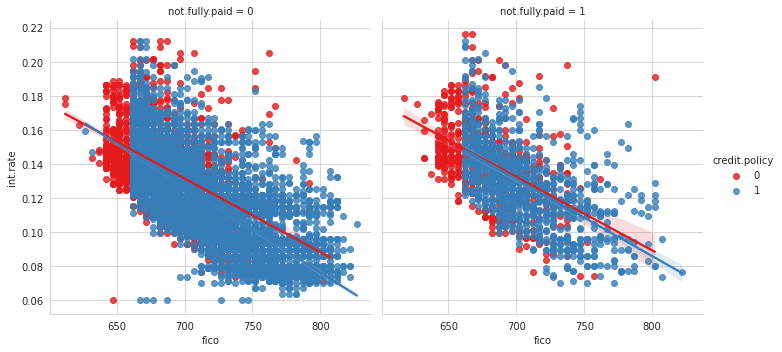

In [48]:
sns.set_style('whitegrid')
#plt.figure(figsize=(12,8))
#plt.tight_layout()
sns.lmplot(y='int.rate', x = 'fico', data = loans, hue = 'credit.policy', col = 'not.fully.paid', palette='Set1')

In [52]:
#Converting categorical variable (here purpose column) into dummy/indicator variables
#Note: columns in below pd.get_dummies is the list of columns that needs to be converted into dummy variables.
final_data = pd.get_dummies(loans, columns = ['purpose'],drop_first=True)

In [53]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_data.drop('credit.policy', axis = 1), final_data['credit.policy'], test_size = 0.3,random_state=101)

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
predictions = dtree.predict(x_test)

In [71]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 538   13]
 [  15 2308]]


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       551
           1       0.99      0.99      0.99      2323

    accuracy                           0.99      2874
   macro avg       0.98      0.98      0.98      2874
weighted avg       0.99      0.99      0.99      2874



<AxesSubplot:>

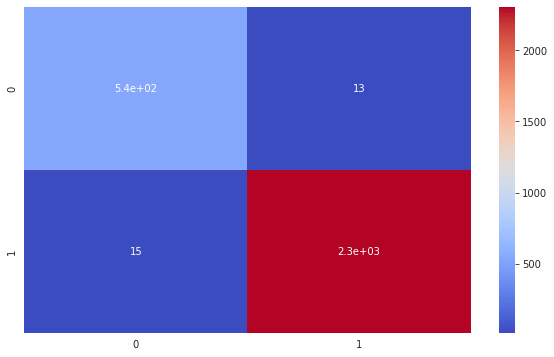

In [78]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions), cmap='coolwarm', annot = True)

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
prediction_rfc = rfc.predict(x_test)

In [76]:
print(confusion_matrix(y_test,prediction_rfc))
print('\n')
print(classification_report(y_test,prediction_rfc))

[[ 520   31]
 [  10 2313]]


              precision    recall  f1-score   support

           0       0.98      0.94      0.96       551
           1       0.99      1.00      0.99      2323

    accuracy                           0.99      2874
   macro avg       0.98      0.97      0.98      2874
weighted avg       0.99      0.99      0.99      2874



<AxesSubplot:>

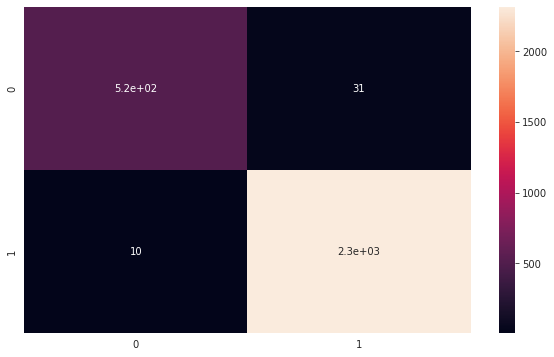

In [79]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,prediction_rfc), annot = True)